In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.ensemble import VotingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Creating data

In [2]:
theta = np.linspace(0, 20, 1000, endpoint=False)

spiral_x_0 = theta / 4 * np.cos(theta)
spiral_y_0 = theta / 4 * np.sin(theta)

f_0 = np.zeros(1000)

spiral_x_1 = (theta / 4 + 0.8) * np.cos(theta)
spiral_y_1 = (theta / 4 + 0.8) * np.sin(theta)

f_1 = np.ones(1000)

spiral_x = np.concatenate((spiral_x_0, spiral_x_1))
spiral_y = np.concatenate((spiral_y_0, spiral_y_1))

X = np.column_stack((spiral_x, spiral_y))

y = np.concatenate((f_0, f_1))

# Splitting data into training and testing data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Creating the models

In [4]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(20,), activation='logistic', solver='adam')
svm_clf = SVC(C=400, kernel='rbf')
rbf_clf = GaussianProcessClassifier(kernel=sklearn.gaussian_process.kernels.RBF())

voting_clf = VotingClassifier(estimators=[('mlp', mlp_clf), ('svm', svm_clf), ('rbf', rbf_clf)], voting='hard')


# Training stage

In [5]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('mlp',
                              MLPClassifier(activation='logistic',
                                            hidden_layer_sizes=(20,))),
                             ('svm', SVC(C=400)),
                             ('rbf',
                              GaussianProcessClassifier(kernel=RBF(length_scale=1)))])

# Testing stage

In [6]:
prediction = voting_clf.predict(X_test)

# Results

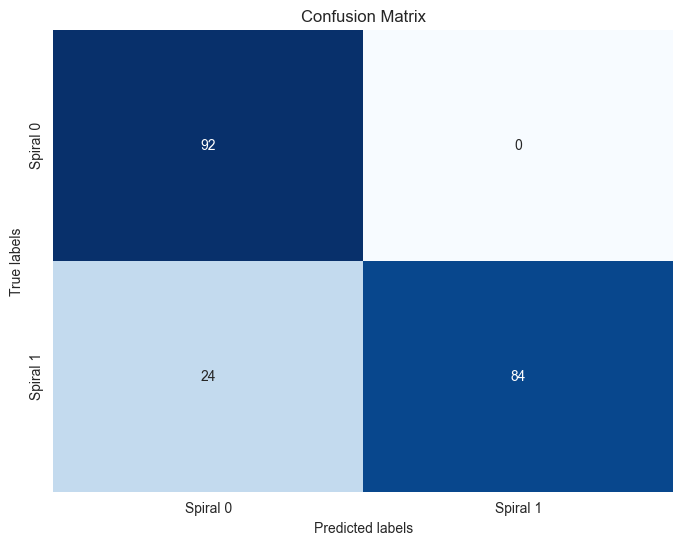

In [7]:
cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=["Spiral 0", "Spiral 1"],
            yticklabels=["Spiral 0", "Spiral 1"])

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()